In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

(225, 225)


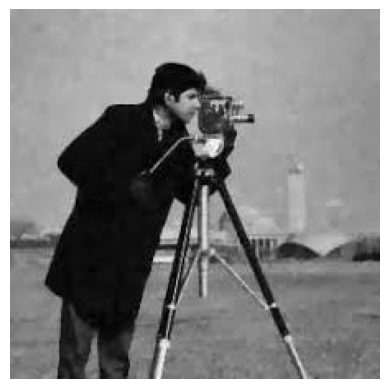

In [2]:
img = cv2.imread(os.path.join('assets','images.jpeg'), cv2.IMREAD_GRAYSCALE)

img_array = np.array(img)

print(img_array.shape)

plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

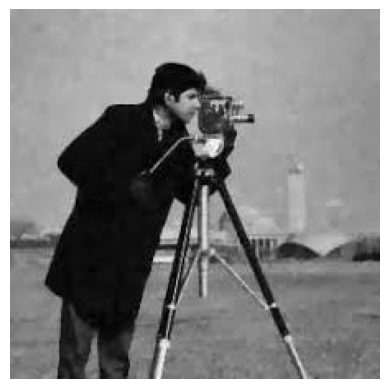

In [3]:
tx= 0
ty= 0

T = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)


translated = cv2.warpAffine(img_array, T, (225, 225))

plt.imshow(translated, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

(450, 450)


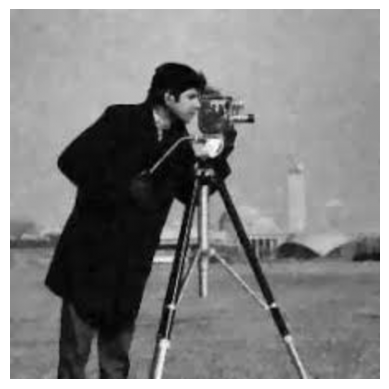

In [13]:
scaled = cv2.resize(
    img_array,
    None,
    fx=2,
    fy=2,
    interpolation=cv2.INTER_LINEAR
)

print(scaled.shape)
plt.imshow(scaled, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

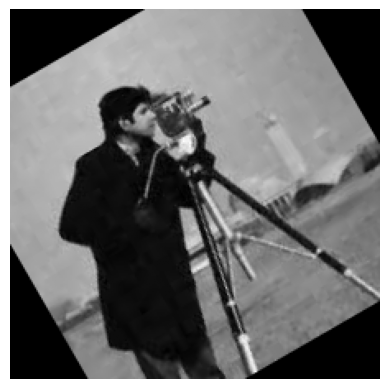

In [14]:
h, w = img_array.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, 30, 1.0)

rotated = cv2.warpAffine(img_array, M, (w, h))
plt.imshow(rotated, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

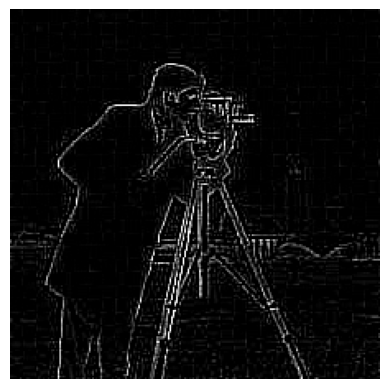

In [15]:
kernel = np.array([
    [ 1, 0,  1],
    [ 0, -4, 0],
    [ 1, 0,  1]
])

result = cv2.filter2D(img_array, -1, kernel)
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

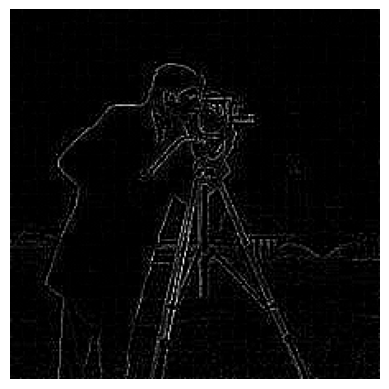

In [16]:
kernel = np.array([
    [ 0, 1,  0],
    [ 1, -4, 1],
    [ 0, 1,  0]
])

result = cv2.filter2D(img_array, -1, kernel)
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

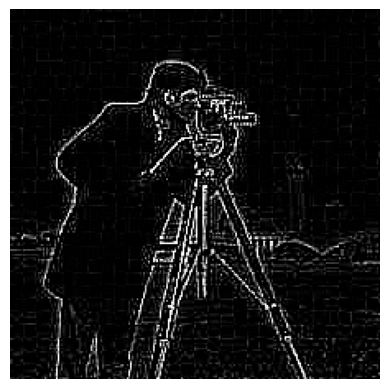

In [21]:
kernel = np.array([
    [ -1, -1,  -1],
    [ -1, 8, -1],
    [ -1, -1,  -1]
])

result = cv2.filter2D(img_array, -1, kernel)
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

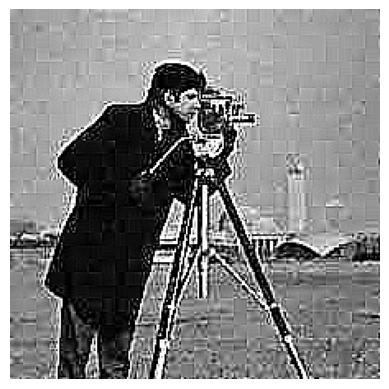

In [20]:
kernel = np.array([
    [ -1, -1,  -1],
    [ -1,  9, -1],
    [ -1, -1,  -1]
])

result = cv2.filter2D(img_array, -1, kernel)
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

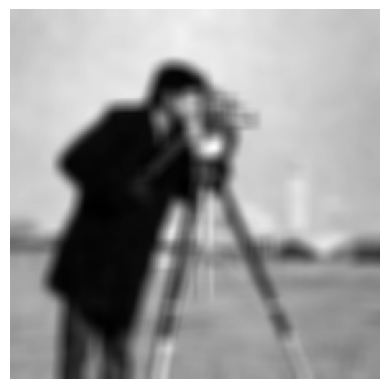

In [4]:
kernel = np.ones((10, 10), dtype=np.float32) / 100

smoothed = cv2.filter2D(img, ddepth=-1, kernel=kernel)

plt.imshow(smoothed, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

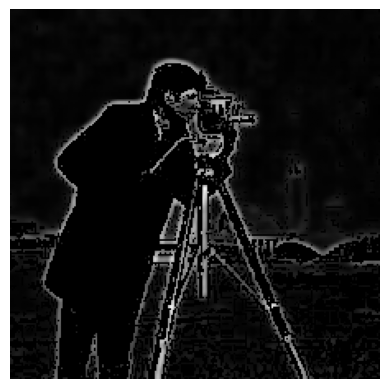

In [ ]:
laplacian_addition_kernel = np.array([
    [ -1, -1,  -1],
    [ -1,  9,  -1],
    [ -1, -1,  -1]
], dtype=np.float32)

laplacian_addition_result = cv2.filter2D(img_array, -1, laplacian_addition_kernel)
laplacian_addition_result = cv2.normalize(laplacian_addition_result, None, 0, 1, cv2.NORM_MINMAX)

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

gx_result = cv2.filter2D(img_array, cv2.CV_32F, sobel_x)
gy_result = cv2.filter2D(img_array, cv2.CV_32F, sobel_y)

magnitude = np.sqrt(gx_result**2 + gy_result**2)
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

# magnitude = cv2.convertScaleAbs(gx) + cv2.convertScaleAbs(gy)

smooth_kernel= np.ones((5, 5), dtype=np.float32) / 25
SGI = cv2.filter2D(magnitude, ddepth=-1, kernel=smooth_kernel)

final_result= laplacian_addition_result * SGI + img_array / 255.0
final_result = cv2.normalize(final_result, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

plt.imshow(final_result, cmap='gray')
plt.axis('off')
plt.show()
plt.close()